In [1]:
import matplotlib.pyplot as plt
import numpy as np
#from skimage.io import imshow
from sklearn.decomposition import PCA
from matplotlib.pyplot import imshow


(400, 64, 64)


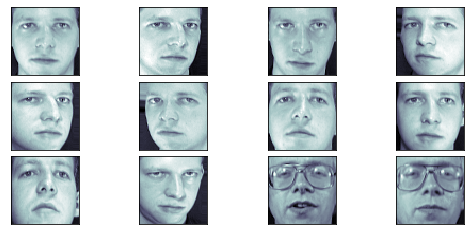

In [3]:
# load dataset.
faces_image = np.load('face_cluster_data/olivetti_faces.npy')
print(faces_image.shape)
# show dataset.
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_image[i], cmap='bone')

(400, 300)
(300, 64, 64)


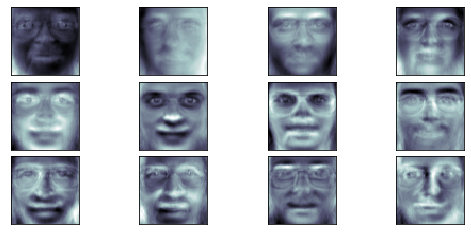

In [9]:
# use PCA to do face dimensionality reduction.
n_components = 300
def face_pca(faces, n_components):
    '''
    利用 sklearn 的 PCA 进行图像降维
    faces: 人脸数据集，faces[i] 为一张 64*64 的图片
    n_components: 选择多少个主成分
    return: pca以后的人脸数据，特征脸
    '''
    h = faces.shape[1]
    w = faces.shape[2]
    
    faces_data = faces.reshape(faces.shape[0], h * w)
    pca = PCA(n_components=n_components).fit(faces_data)
    
    eigen_faces = pca.components_.reshape((n_components, h, w))
    faces_pca = pca.transform(faces_data)
    return faces_pca, eigen_faces

faces_pca, eigen_faces = face_pca(faces_image, n_components)
print(faces_pca.shape)
print(eigen_faces.shape)
# Show eigen faces
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigen_faces[i], cmap='bone')

current step:0
current step:1
current step:2
current step:3
current step:4
current step:5
current step:6
current step:7
current step:8
current step:9
current step:10


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


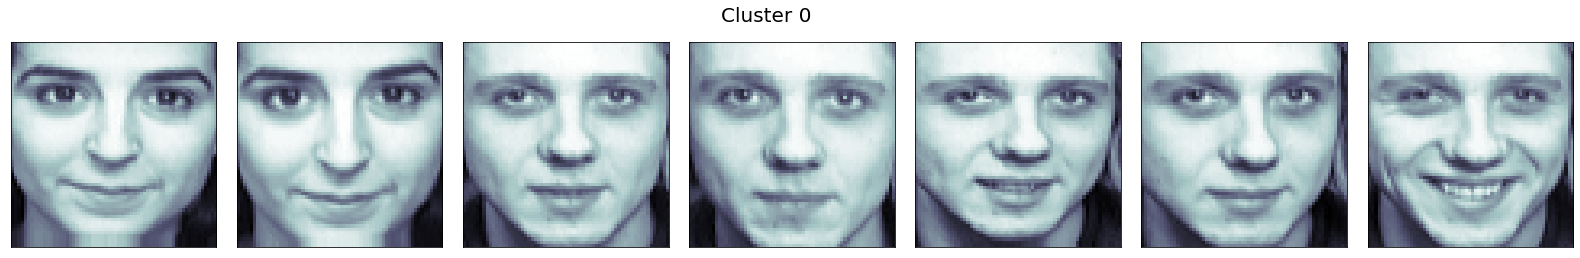

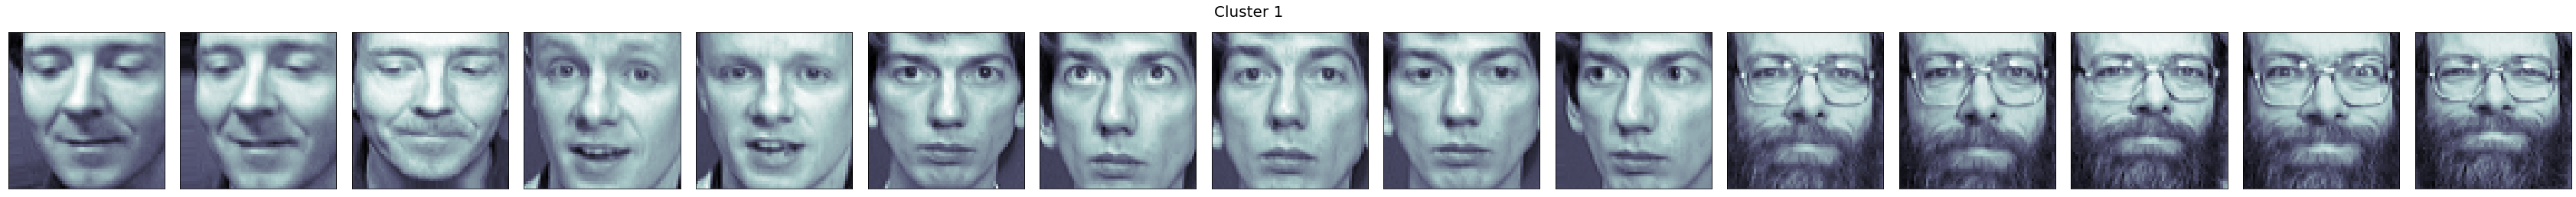

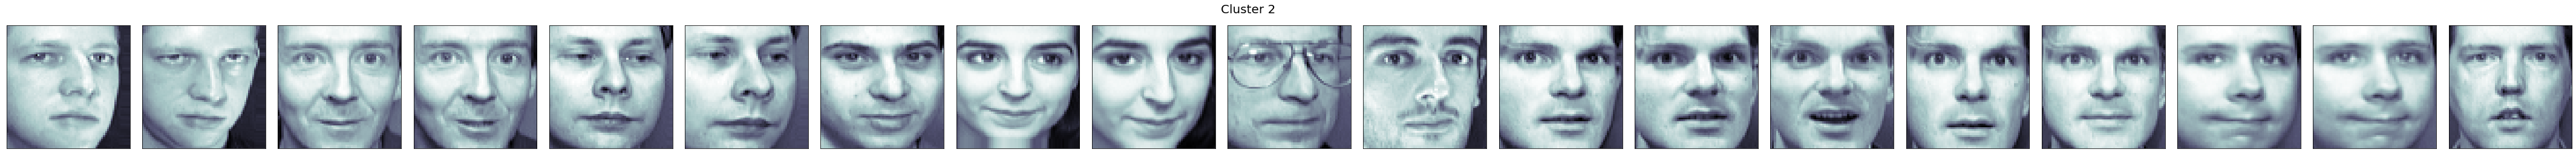

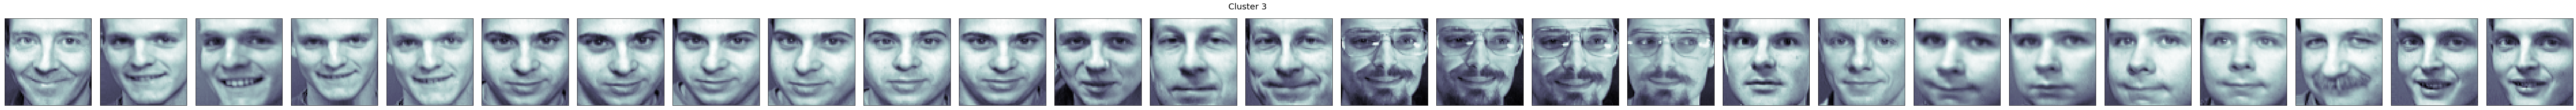

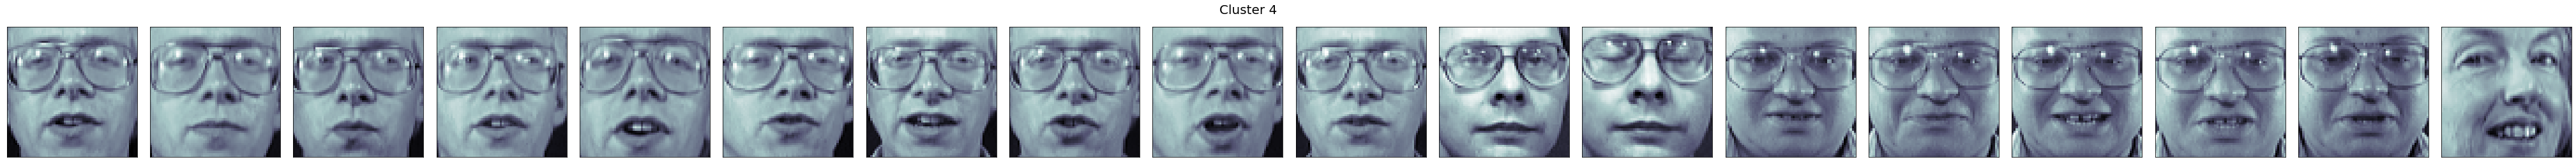

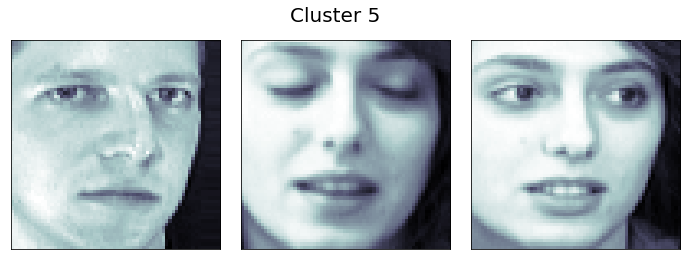

<Figure size 0x288 with 0 Axes>

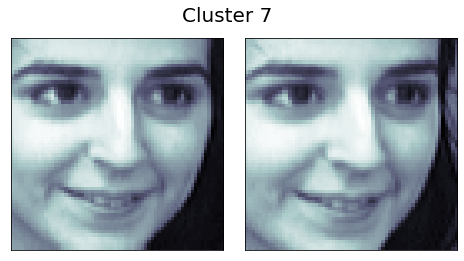

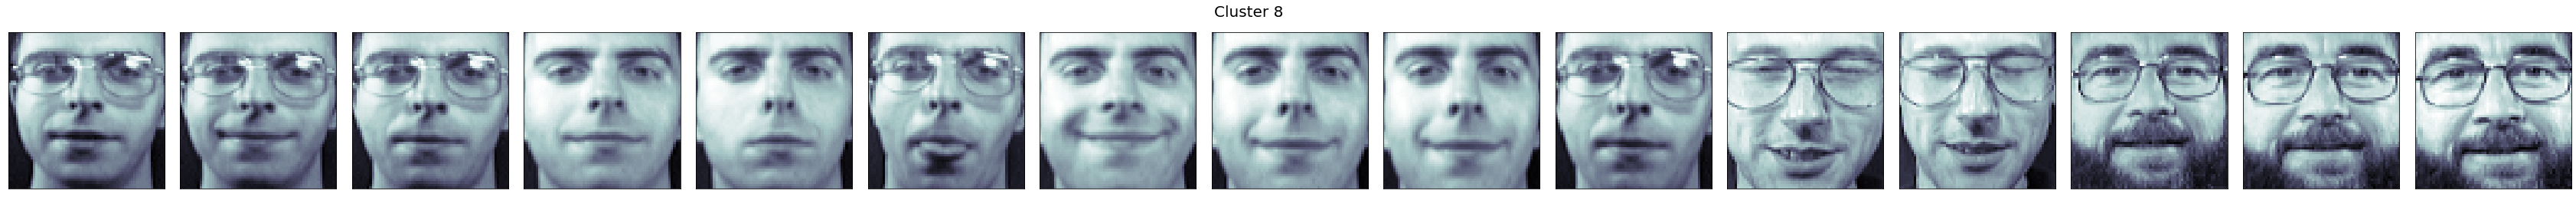

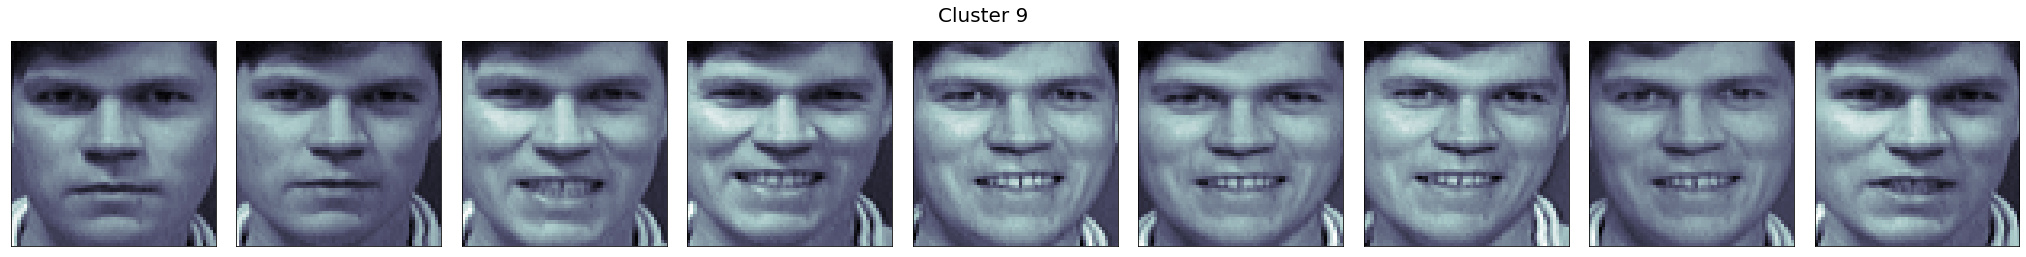

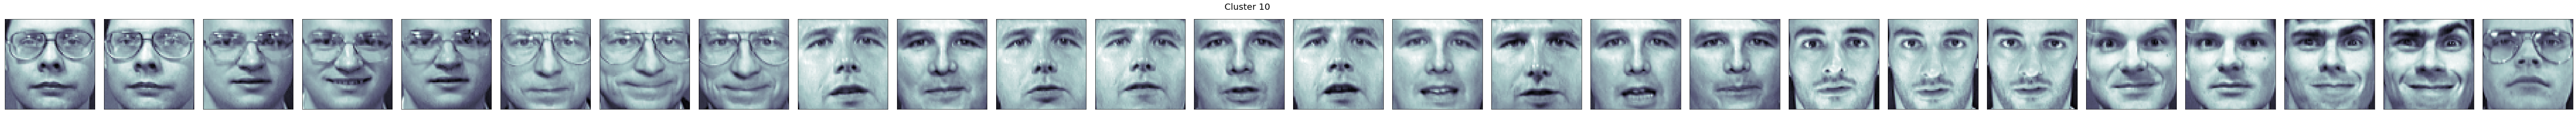

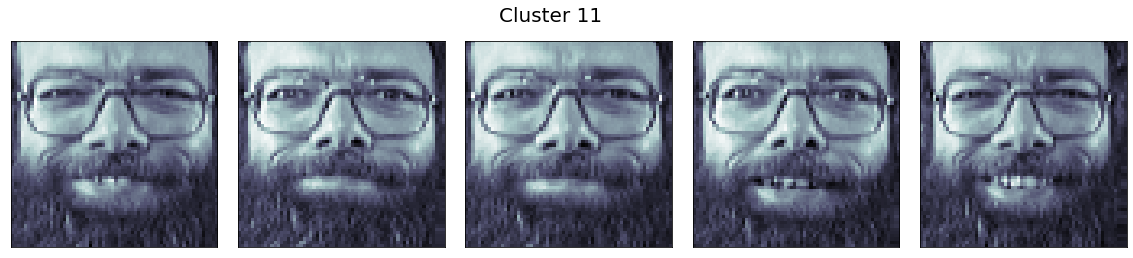

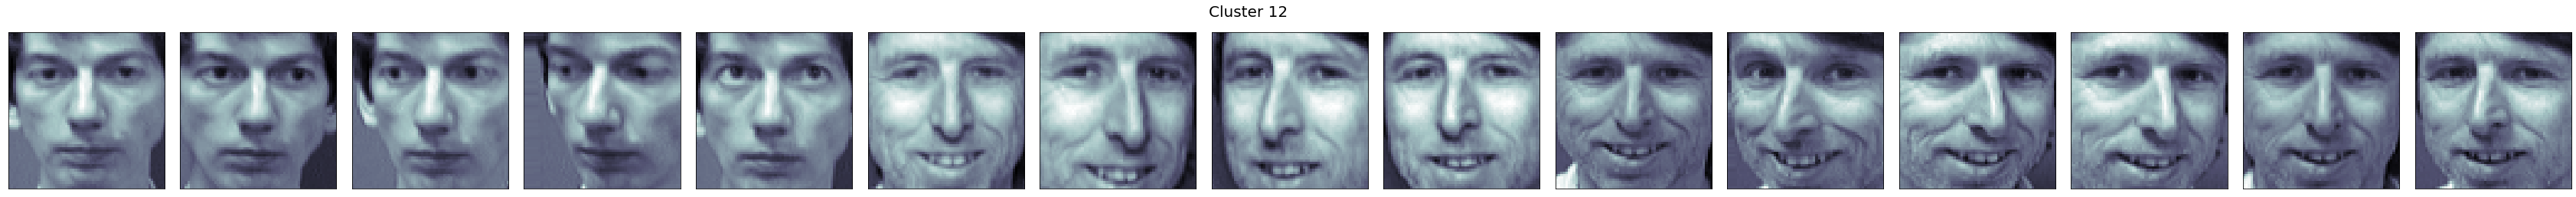

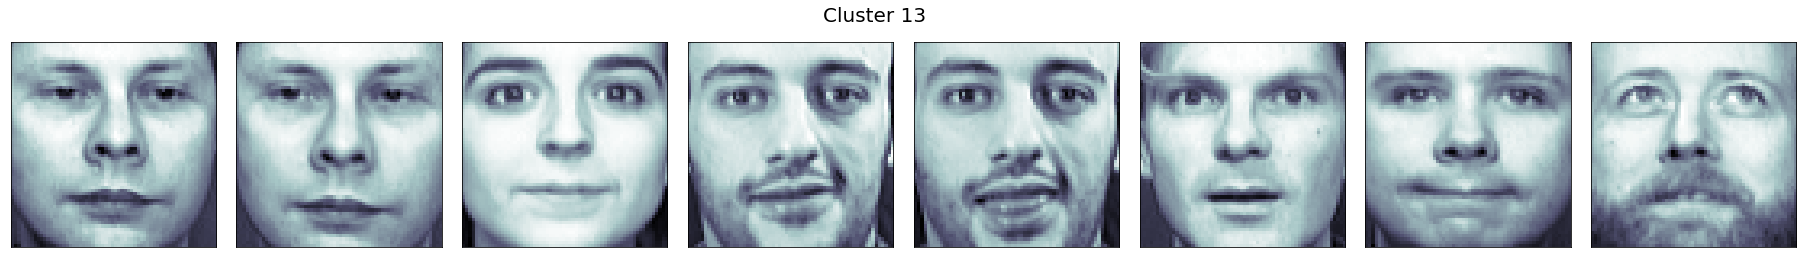

<Figure size 0x288 with 0 Axes>

<Figure size 0x288 with 0 Axes>

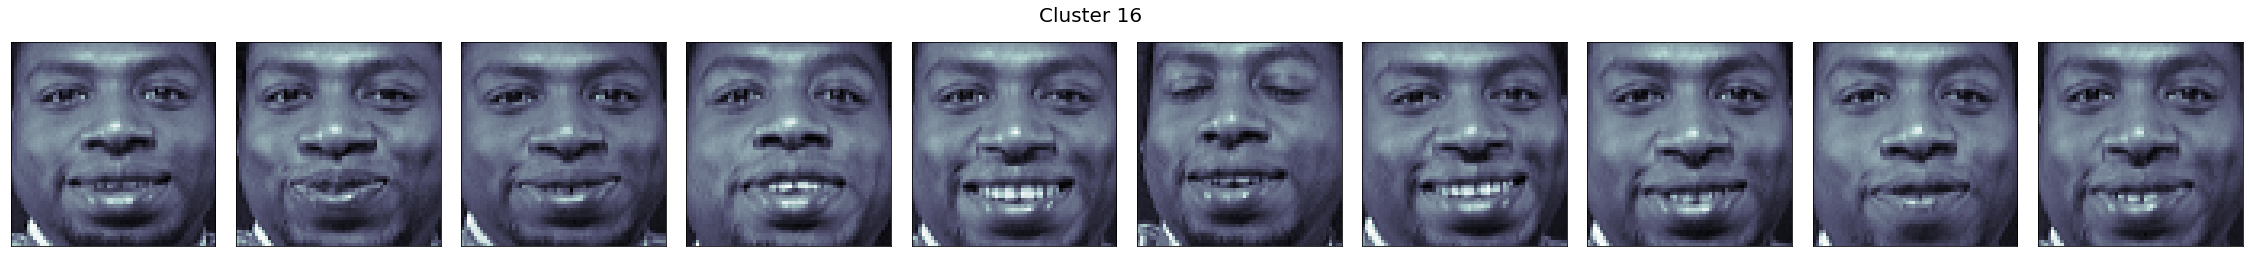

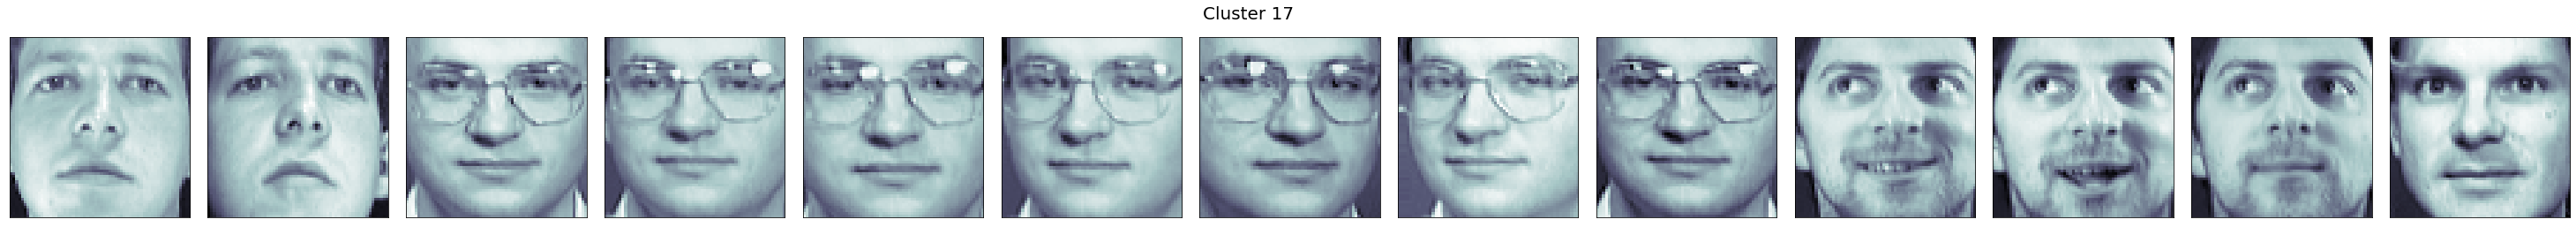

<Figure size 0x288 with 0 Axes>

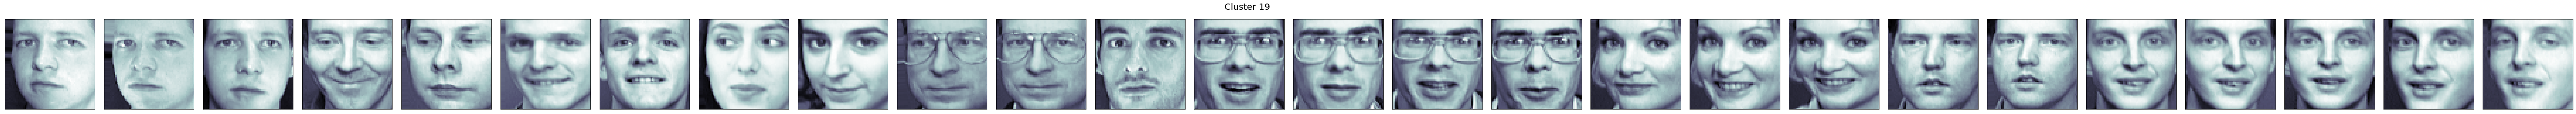

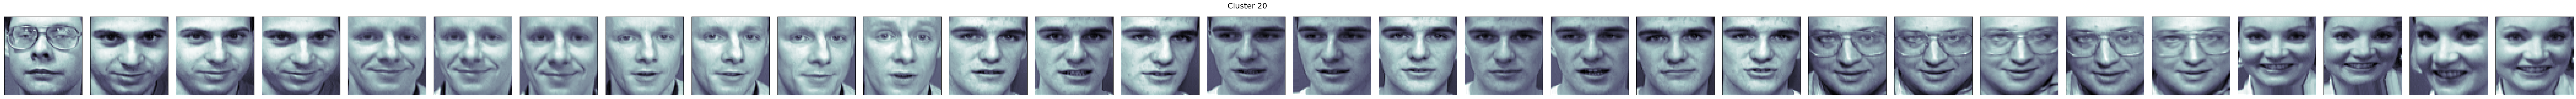

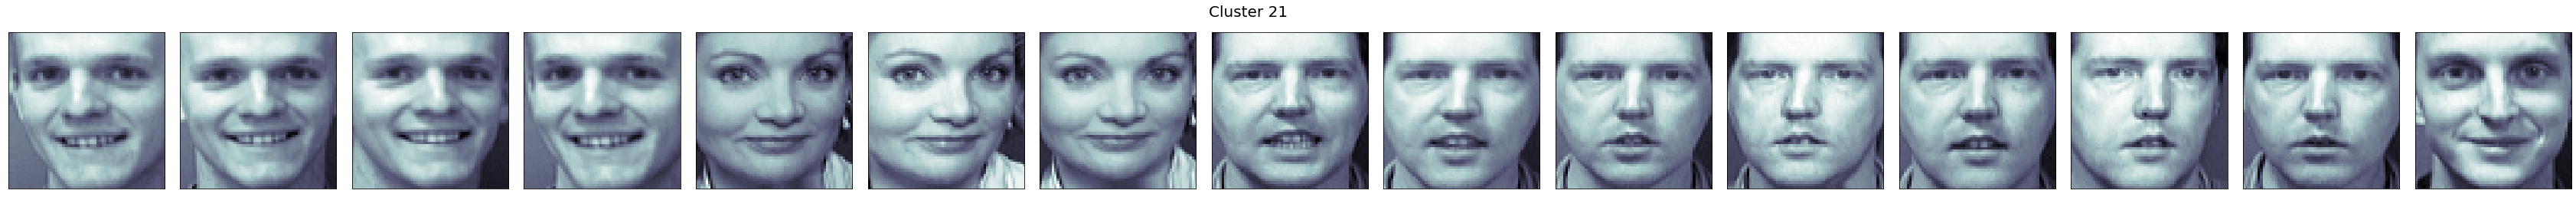

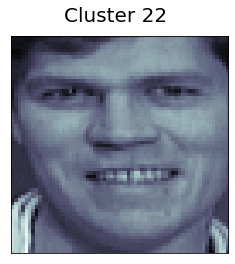

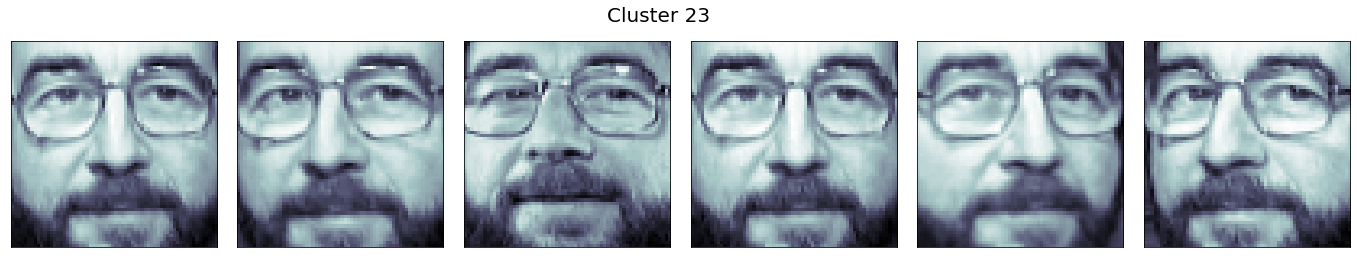

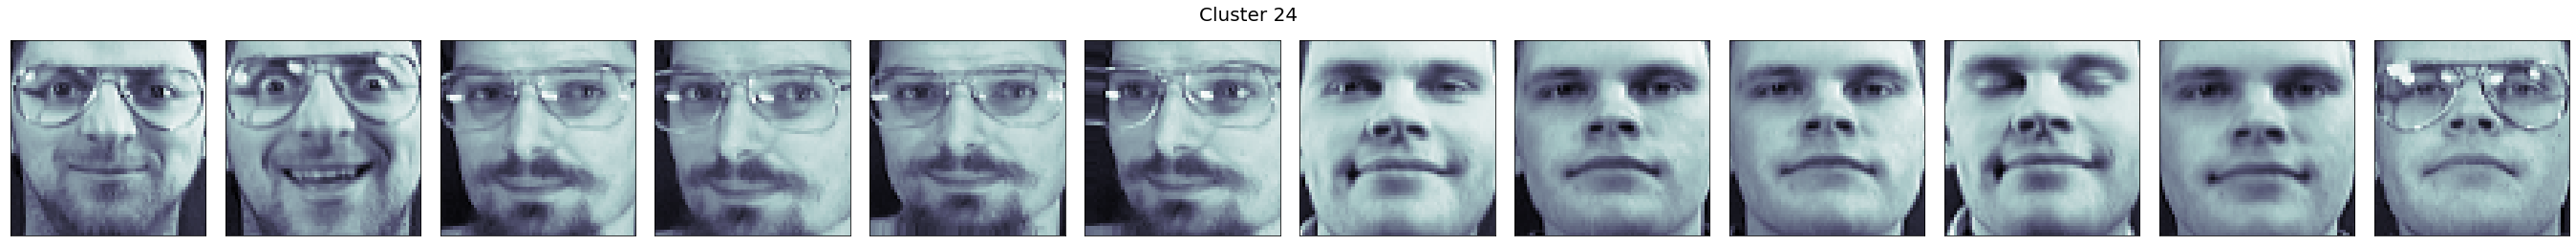

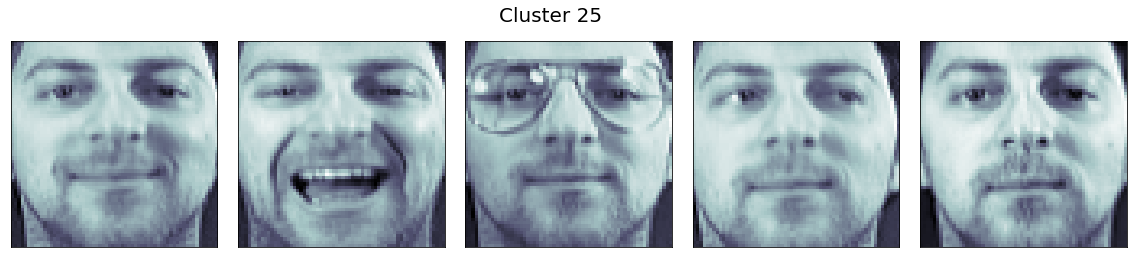

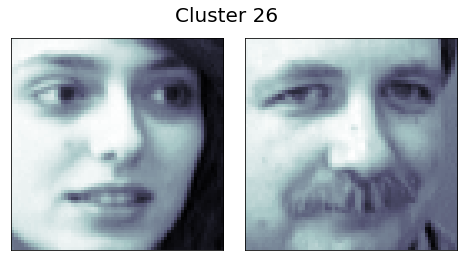

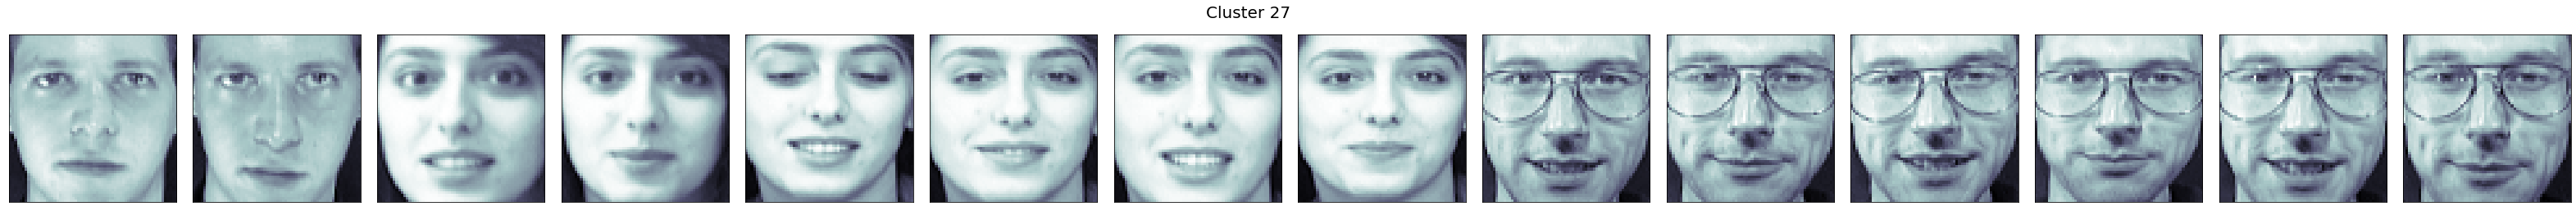

<Figure size 0x288 with 0 Axes>

<Figure size 0x288 with 0 Axes>

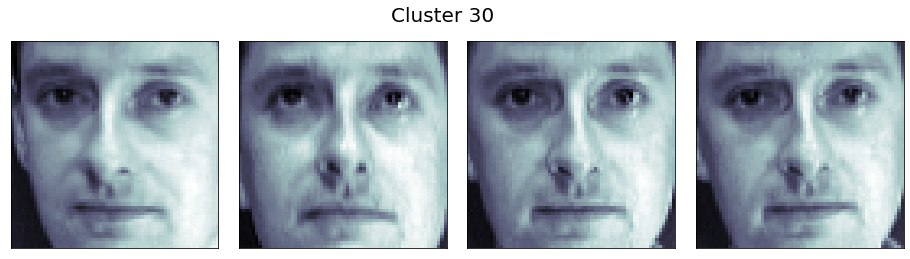

<Figure size 0x288 with 0 Axes>

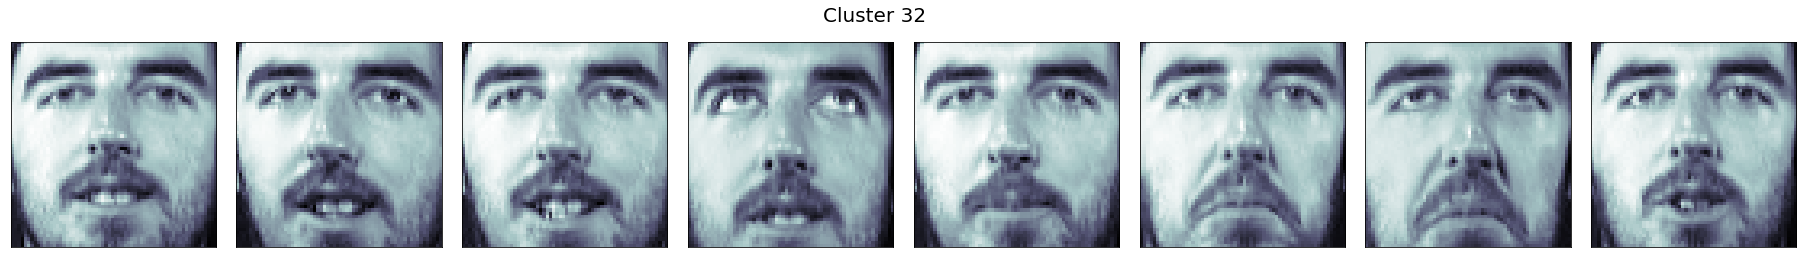

<Figure size 0x288 with 0 Axes>

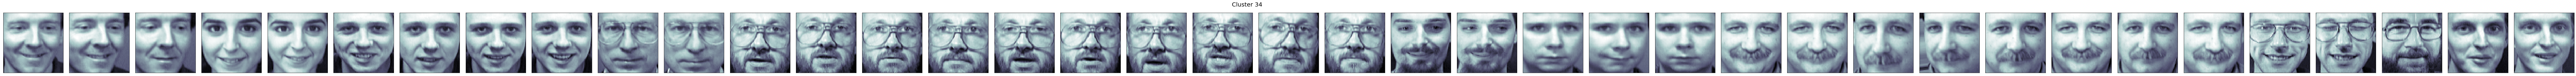

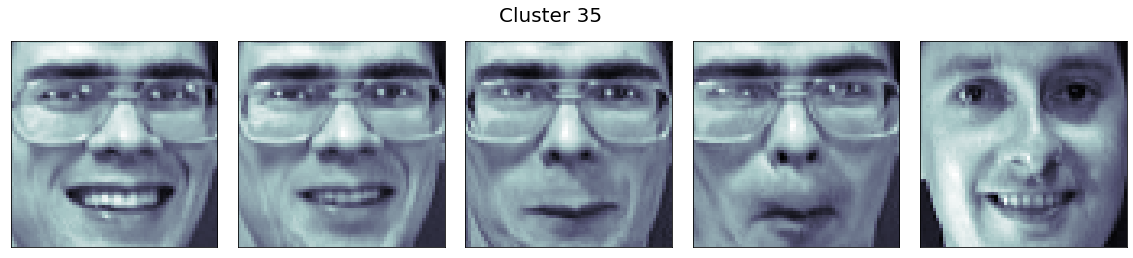

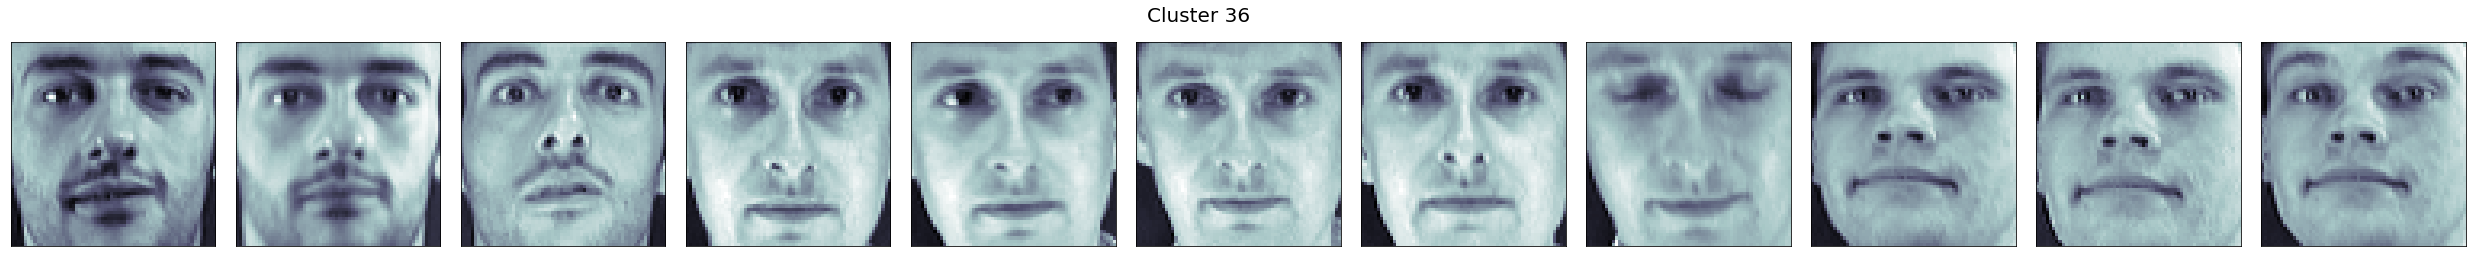

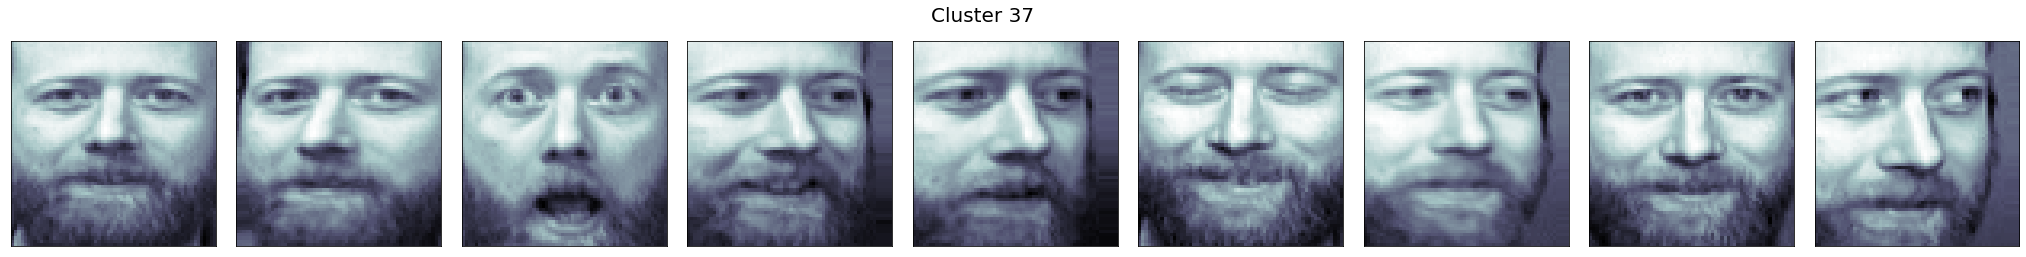

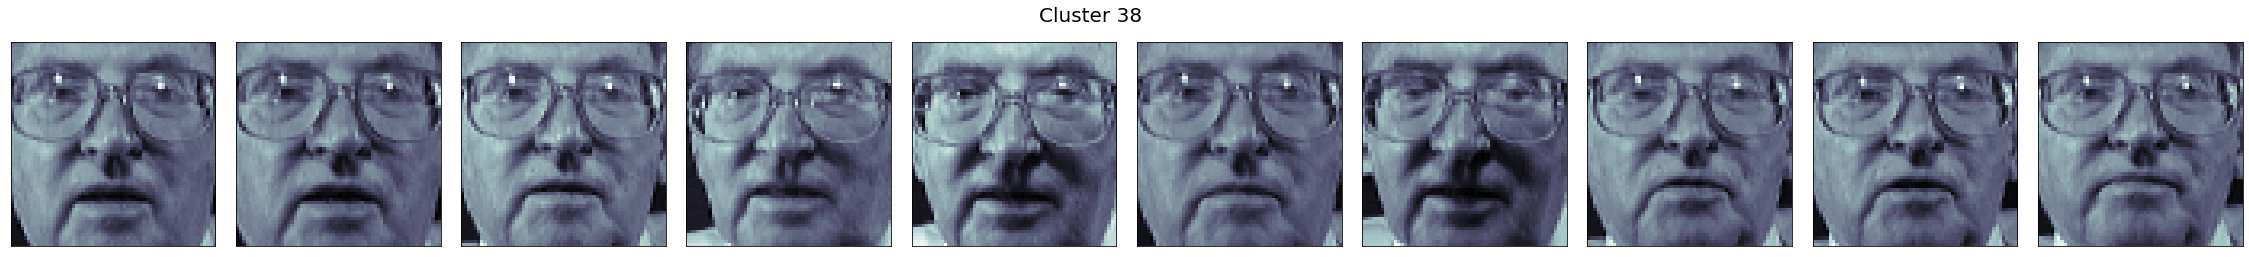

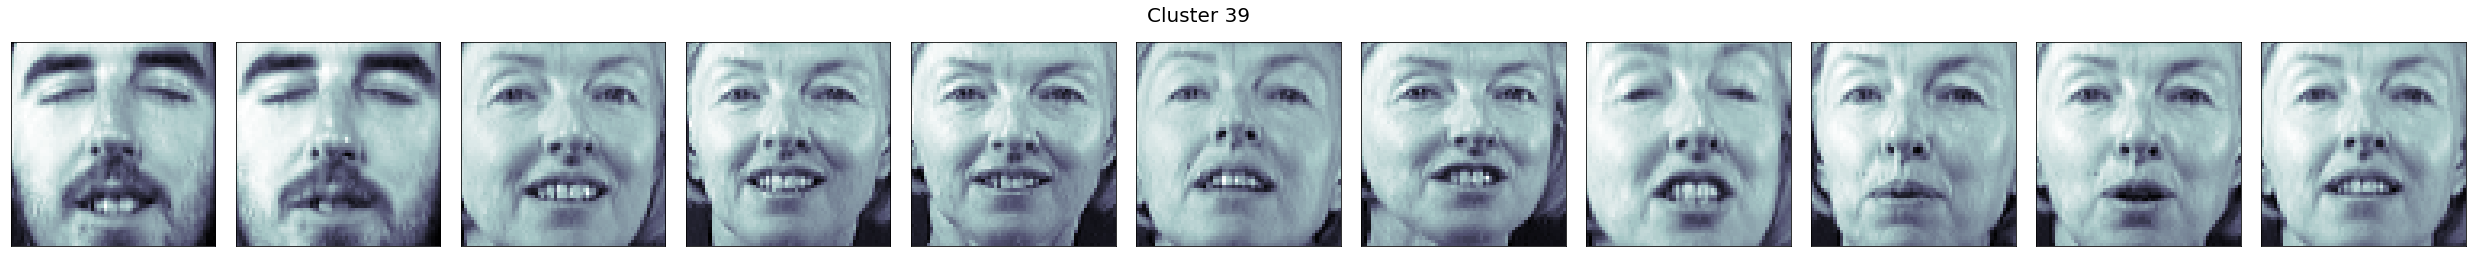

In [8]:
# Implement k-means.
# Implement k-means.
class KMeans():
    def __init__(self, k=40, max_iter=500):
        self.k = k
        self.max_iter = max_iter
        # n * 1 的数组，保存每个样本的 final cluster id
        self.labels = None
    
    def _dist(self, a, b):
        '''
        a: 一维数组
        b: 一维数组
        return: 欧几里得距离
        '''
        return np.math.sqrt(sum(np.power(a - b, 2)))
    
    def _randCenter(self, data, k):
        '''
        data: n * m 的样本，其中 n 是样本个数，m 是特征个数
        k: cluster 的个数
        return: 随机选择的 k 个质心
        '''
        m = data.shape[1]
        centers = np.empty((k, m))
        for i in range(m):
            minVal = min(data[:, i])
            maxVal = max(data[:, i])
            centers[:, i] = (minVal + (maxVal - minVal) * np.random.rand(k, 1)).flatten()
        return centers
    
    def fit(self, data):
        '''
        将输入的data进行聚类，并将聚类结果保存在self.label中
        data: n * m 的样本，其中 n 是样本个数，m 是特征个数
        '''
        n = data.shape[0]
        cluster_assign = np.zeros(n)
        
        centers = self._randCenter(data, self.k)
        
        for step in range(self.max_iter):
            print("current step:{}".format(step))
            cluster_changed = False
            
            for i in range(n):
                min_dist = np.inf
                min_ind = -1
                
                for j in range(self.k):
                    center = centers[j, :]
                    sample = data[i, :]
                    dist = self._dist(center, sample)
                    if dist < min_dist:
                        min_dist = dist
                        min_ind = j
                    
                if cluster_assign[i] != min_ind:
                    cluster_changed = True
                    cluster_assign[i] = min_ind
                    
            if not cluster_changed:
                break
            
            for i in range(self.k):
                ind = np.nonzero(cluster_assign == i)[0]
                centers[i, :] = np.mean(data[ind], axis=0)
        
        self.labels = cluster_assign

# Clustering
cluster_num = 40
cluster = KMeans(k=cluster_num)
cluster.fit(faces_pca)

# Show the final results
# Show the final results
labels = cluster.labels
for i in range(cluster_num):
    index = np.nonzero(labels==i)[0]
    num = len(index)
    this_faces = faces_image[index]
    fig, axes = plt.subplots(1, num, figsize=(4 * num, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(fig.axes):
        ax.imshow(this_faces[i], cmap='bone')
        
        
#类间距离尽可能大
#类外距离尽可能远
#通过类簇直径判断
#聚类可以作为机器标注的一种方式


